In [1]:
import numpy as np
import pandas as pd
import ipyleaflet 

In [2]:
nmeadata = pd.read_csv('AML/Exercises/Jammer_detection/data/nmea.csv', nrows=100)
nmeadata

,timestamp,lat,lon,height
0,2024-09-10T122149,69.212358,15.858570,8.0
1,2024-09-10T122150,69.212365,15.858571,10.2
2,2024-09-10T122151,69.212375,15.858584,11.8
3,2024-09-10T122152,69.212369,15.858604,11.9
4,2024-09-10T122154,69.212368,15.858616,11.9
...,...,...,...,...
95,2024-09-10T122325,69.212369,15.858315,8.5
96,2024-09-10T122326,69.212391,15.858258,8.3
97,2024-09-10T122327,69.212426,15.858206,8.1
98,2024-09-10T122328,69.212474,15.858150,7.5


In [3]:
stave=(69.21230, 15.85849)
map = ipyleaflet.Map(center=stave, zoom=18)
map.add(ipyleaflet.Marker(location=stave))
path=nmeadata.iloc[:,1:3].values.tolist()
map.add(ipyleaflet.AntPath(locations=path,delay=1000))
map

Map(center=[69.2123, 15.85849], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'z…

In [4]:
!pip install networkx osmnx
import networkx as nx
import osmnx as ox

Defaulting to user installation because normal site-packages is not writeable


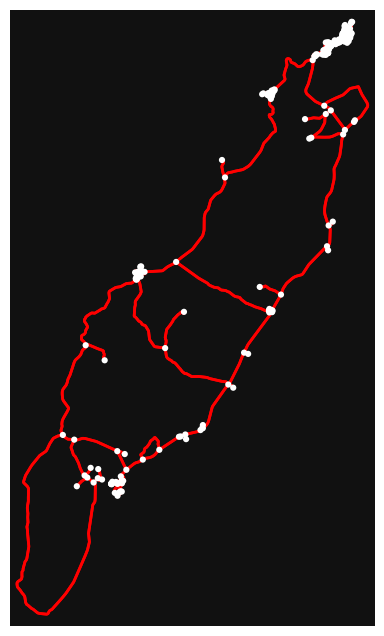

In [5]:
# Fetch the roads around Andøya, from Open Streemaps as a graph, and plot it
G_andoya = ox.graph_from_place("Andoya, Norway", network_type="drive")
fig, ax = ox.plot_graph(G_andoya, edge_color='red', edge_linewidth=2, node_size=20)

In [6]:
# Setup the coordinates of some locations
bleik=69.275800025,15.967875687
stave=69.21230, 15.85849
nordmela=69.136405, 15.676996

# Impute missing edge speeds and calculate edge travel times with the speed module, if you need them
G_v = ox.routing.add_edge_speeds(G_andoya)
G_t = ox.routing.add_edge_travel_times(G_v)

# get the nearest network nodes to two lat/lng points with the distance module
orig = ox.distance.nearest_nodes(G_andoya, X=nordmela[1], Y=nordmela[0])
dest = ox.distance.nearest_nodes(G_andoya, X=stave[1], Y=stave[0])

route = ox.shortest_path(G_andoya, orig, dest, weight="length")
display(route)

[5351705230,
 5351706058,
 5351705076,
 5351705057,
 5351706082,
 1593174043,
 5351796473]

In [7]:
# Convert route to Geopandas data frame and show it
import matplotlib.pyplot as plt
gdf=ox.routing.route_to_gdf(G_andoya, route)
gdf

,,,osmid,ref,name,highway,maxspeed,oneway,reversed,length,speed_kph,travel_time,geometry,bridge
u,v,key,,,,,,,,,,,,
5351705230,5351706058,0,178004111,7702,Nordmelaveien,secondary,50,False,True,127.546,50.0,9.2,"LINESTRING (15.67681 69.13654, 15.67689 69.136...",NaN
5351706058,5351705076,0,178004111,7702,Nordmelaveien,secondary,50,False,True,71.157,50.0,5.1,"LINESTRING (15.67994 69.13636, 15.68116 69.136...",NaN
5351705076,5351705057,0,178004111,7702,Nordmelaveien,secondary,50,False,True,66.408,50.0,4.8,"LINESTRING (15.68174 69.13636, 15.68342 69.13639)",NaN
5351705057,5351706082,0,"[110276713, 178004111]",7702,Nordmelaveien,secondary,"[50, 80]",False,"[False, True]",304.484,65.0,16.9,"LINESTRING (15.68342 69.13639, 15.68627 69.136...",NaN
5351706082,1593174043,0,"[110276713, 110276731, 1058046071]",7702,"[Nordelv bru, Nordmelaveien]",secondary,80,False,"[False, True]",2893.960,80.0,130.2,"LINESTRING (15.69109 69.13654, 15.69894 69.136...",yes
1593174043,5351796473,0,"[146221696, 110301191, 554569928, 554569927, 1...",7702,"[Skogvoll, Stavedalsveien]",secondary,"[80, 60]",False,"[False, True]",8743.603,70.0,449.7,"LINESTRING (15.75843 69.14408, 15.75926 69.144...",yes


In [8]:
# Plot the route in the map

import matplotlib 
import folium 
import mapclassify
gdf.explore()

In [9]:
import re
import pandas as pd
from datetime import datetime
import georinex as gr

rinex_data = gr.load('AML/Exercises/Jammer_detection/data/gnss_log_2024_09_10_14_21_50.24o')

file_path = 'AML/Exercises/Jammer_detection/data/gnss_log_2024_09_10_14_21_50.nmea'

with open(file_path, 'r') as file:
    nmea_data = file.readlines()

#printing first few lines of the NMEA file to inspect structure
for line in nmea_data[:10]:
    print(line.strip())

#using simplified regex to just capture the timestamp
def extract_timestamp(sentence):
    # Match pattern to extract timestamp (hhmmss.sss)
    pattern = r"(\d{6}\.\d+)"
    match = re.search(pattern, sentence)
    if match:
        return match.group(1)
    return None

#Extracting latitudes and longitudes from $GPGGA sentences
def extract_lat_lon(sentence):
    # Match pattern to extract lat, lon, and direction (N/S, E/W)
    pattern = r"\$GPGGA,\d{6}\.\d{2},(\d{2})(\d{2}\.\d+),([NS]),(\d{3})(\d{2}\.\d+),([EW])"
    match = re.search(pattern, sentence)
    if match:
        # Latitude (degrees + minutes/60), adjust for N/S
        lat_deg = float(match.group(1))  # degrees (first part of lat)
        lat_min = float(match.group(2))  # minutes (second part of lat)
        lat = lat_deg + lat_min / 60  # convert to decimal latitude
        if match.group(3) == "S":  # adjust for South
            lat = -lat

        # Longitude (degrees + minutes/60), adjust for E/W
        lon_deg = float(match.group(4))  # degrees (first part of lon)
        lon_min = float(match.group(5))  # minutes (second part of lon)
        lon = lon_deg + lon_min / 60  # convert to decimal longitude
        if match.group(6) == "W":  # adjust for West
            lon = -lon
        
        return lat, lon
    return None, None

# Loopping to process each line, extract timestamps, latitudes, and longitudes
timestamps = []
latitudes = []
longitudes = []

for sentence in nmea_data:
    timestamp = extract_timestamp(sentence)
    if timestamp:
        lat, lon = extract_lat_lon(sentence)
        if lat is not None and lon is not None:
            timestamps.append(timestamp)
            latitudes.append(lat)
            longitudes.append(lon)

#Now we can create the dataframe, since the lengths should match
if timestamps:
    timestamps = [datetime.strptime(ts, "%H%M%S.%f") for ts in timestamps]
    nmea_df = pd.DataFrame({'timestamp': timestamps, 'latitude': latitudes, 'longitude': longitudes})
    print(nmea_df.head(20))
else:
    print("No valid data found.")

NMEA,$GPGGA,122149.62,6912.741481,N,01551.514172,E,1,10,0.5,8.0,M,34.4,M,,*6D,1725970911059
NMEA,$PGLOR,12,STA,122149.62,0.135,0.500,-112,98,5,0,P,F,L,0,C,2,S,00000002,0,3,R,00000000,TPEF,38,4105,LC,,,DR,0,,,,tf*00,1725970911060
NMEA,$PGLOR,1,UNC,122149.62,200000.000,5.3,9.0,0.52,180.00,5.6,5.6,90.0*2E,1725970911060
NMEA,$PGLOR,2,SAT,6,1,R06,25,27,G09,40,3A3,B21,,20021,R15,32,27,G11,36,201A7,B22,38,20023*37,1725970911060
NMEA,$PGLOR,2,SAT,6,2,B36,32,27,R07,41,27,R22,35,27,R23,32,27,G20,36,27,G07,29,27*2D,1725970911060
NMEA,$PGLOR,2,SAT,6,3,R16,35,23,G16,35,23,G26,33,1A3,G06,37,1A3,E09,,20,E06,,20*2B,1725970911060
NMEA,$PGLOR,2,SAT,6,4,E34,,20,B09,,20,G04,,20,E04,,20,B06,,20,E05,,20*3F,1725970911060
NMEA,$PGLOR,2,SAT,6,5,B16,,20,B43,,20,E36,,20,E21,,20,B42,,20,G29,,20*3F,1725970911061
NMEA,$PGLOR,2,SAT,6,6,N09,,20,E15,,20*34,1725970911061
NMEA,$PGLOR,2,SVC,GPS,0,3,1,09,007,FFUS,FFUS,009,FFUS,FFUS,011,FFUS,FFUS,020,FFUS,FFUS*6D,1725970911061
                 timestamp   latitude  longitu

In [10]:
#setting the reference date to be the start date in the 'nmea_df' (1900-01-01)
reference_date = pd.Timestamp('1900-01-01')

#setting the target date (2024-09-10)
target_date = pd.Timestamp('2024-09-10')

#Calculating the time difference between 1900-01-01 and 2024-09-10
time_diff = target_date - reference_date

#adding the time difference to the 'timestamp' column in nmea_df
nmea_df['timestamp'] = nmea_df['timestamp'] + time_diff

#checking
print(nmea_df[['timestamp', 'latitude', 'longitude']])

                   timestamp   latitude  longitude
0    2024-09-10 12:21:49.620  69.212358  15.858570
1    2024-09-10 12:21:50.600  69.212365  15.858571
2    2024-09-10 12:21:51.600  69.212375  15.858584
3    2024-09-10 12:21:52.600  69.212369  15.858604
4    2024-09-10 12:21:54.000  69.212368  15.858616
...                      ...        ...        ...
1366 2024-09-10 12:44:36.000  69.212339  15.858625
1367 2024-09-10 12:44:37.000  69.212339  15.858624
1368 2024-09-10 12:44:38.000  69.212340  15.858628
1369 2024-09-10 12:44:39.000  69.212340  15.858629
1370 2024-09-10 12:44:40.000  69.212340  15.858635

[1371 rows x 3 columns]


<Figure size 1400x600 with 0 Axes>

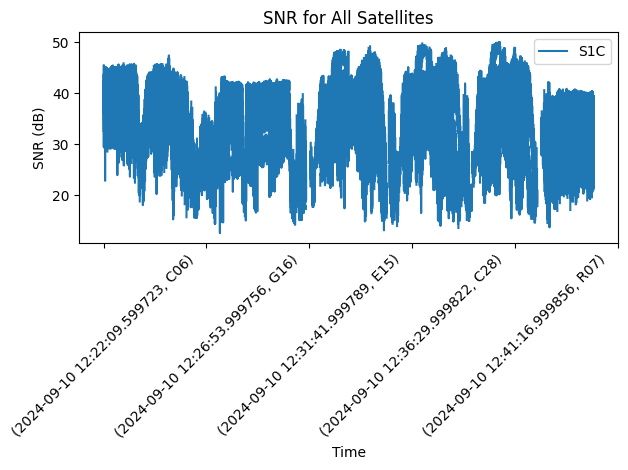

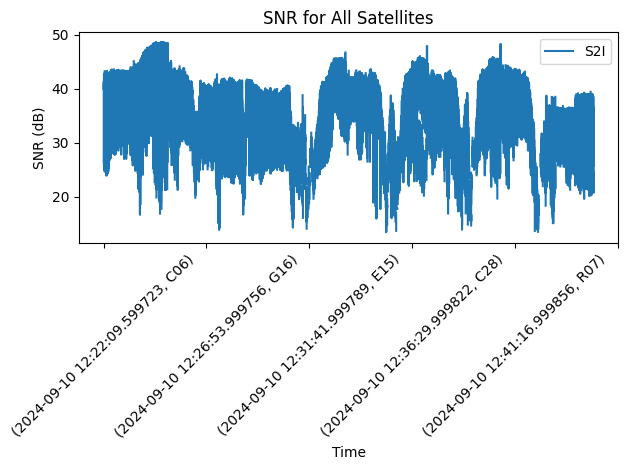

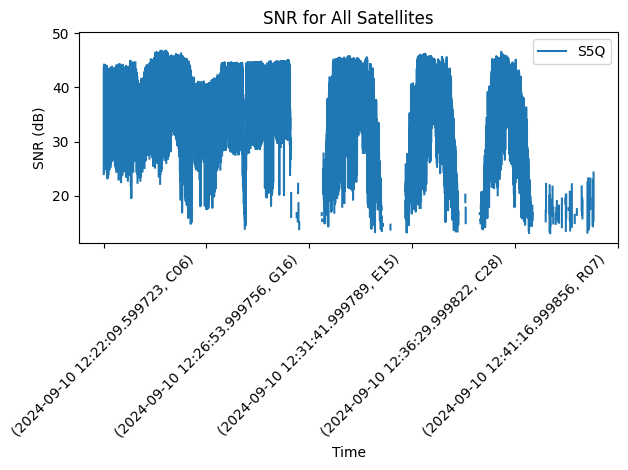

In [11]:
import matplotlib.pyplot as plt

#extracting the S1C data
snr_dataL1 = rinex_data['S1C']
snr_dataL2 = rinex_data['S2I']
snr_dataL5 = rinex_data['S5Q']
#converting the S1C data to a pandas dataframe
snr_dfL1 = snr_dataL1.to_dataframe()
snr_dfL2 = snr_dataL2.to_dataframe()
snr_dfL5 = snr_dataL5.to_dataframe()
plt.figure(figsize=(14, 6))  

#plot SNR for all satellites
snr_dfL1.plot(title='SNR for All Satellites')
plt.xlabel('Time')
plt.ylabel('SNR (dB)')
plt.xticks(rotation=45)  #rotate time labels for better visibility
plt.tight_layout()
plt.show()
snr_dfL2.plot(title='SNR for All Satellites')
plt.xlabel('Time')
plt.ylabel('SNR (dB)')
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()
snr_dfL5.plot(title='SNR for All Satellites')

#customize the plot
plt.xlabel('Time')
plt.ylabel('SNR (dB)')
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()

Classification Report:
               precision    recall  f1-score   support

       False       0.99      1.00      1.00       162
        True       1.00      0.94      0.97        17

    accuracy                           0.99       179
   macro avg       1.00      0.97      0.98       179
weighted avg       0.99      0.99      0.99       179

Confusion Matrix:
 [[162   0]
 [  1  16]]
Accuracy Score: 0.994413407821229


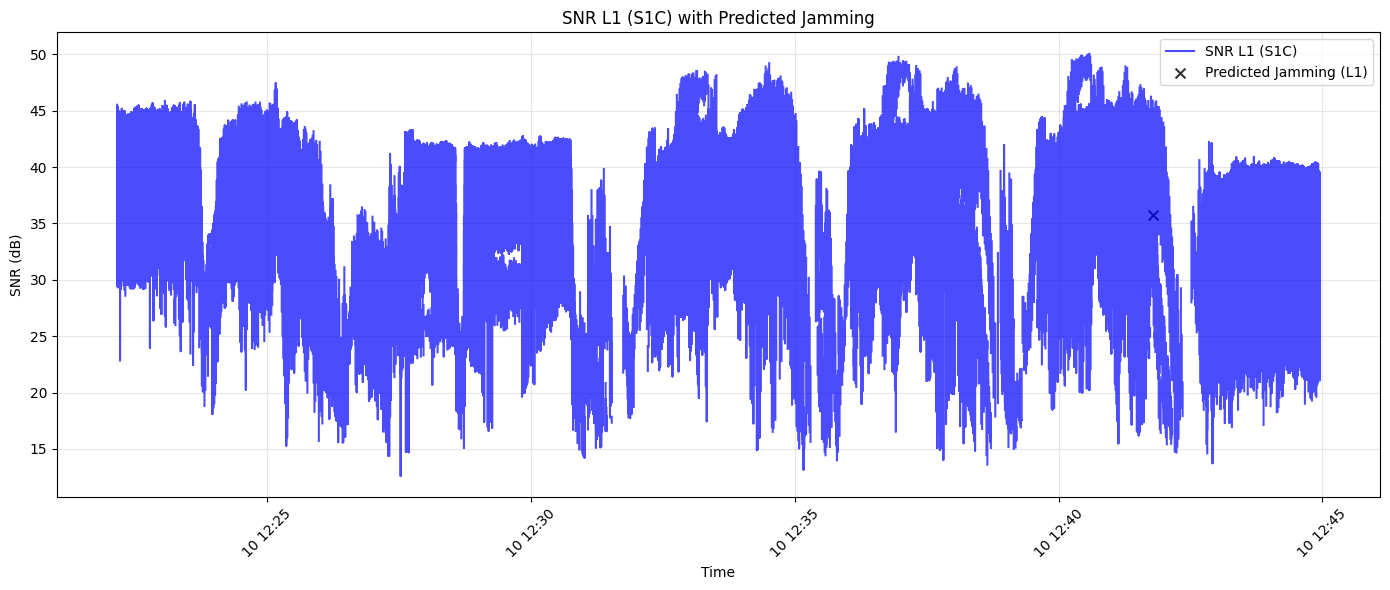

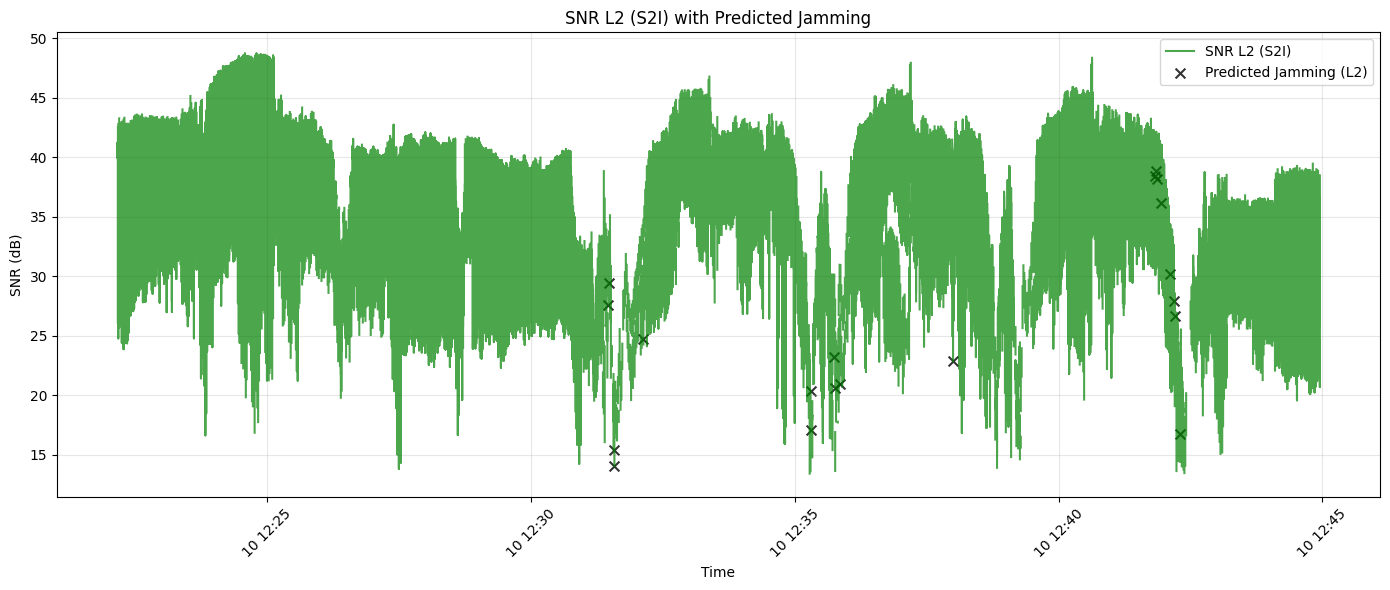

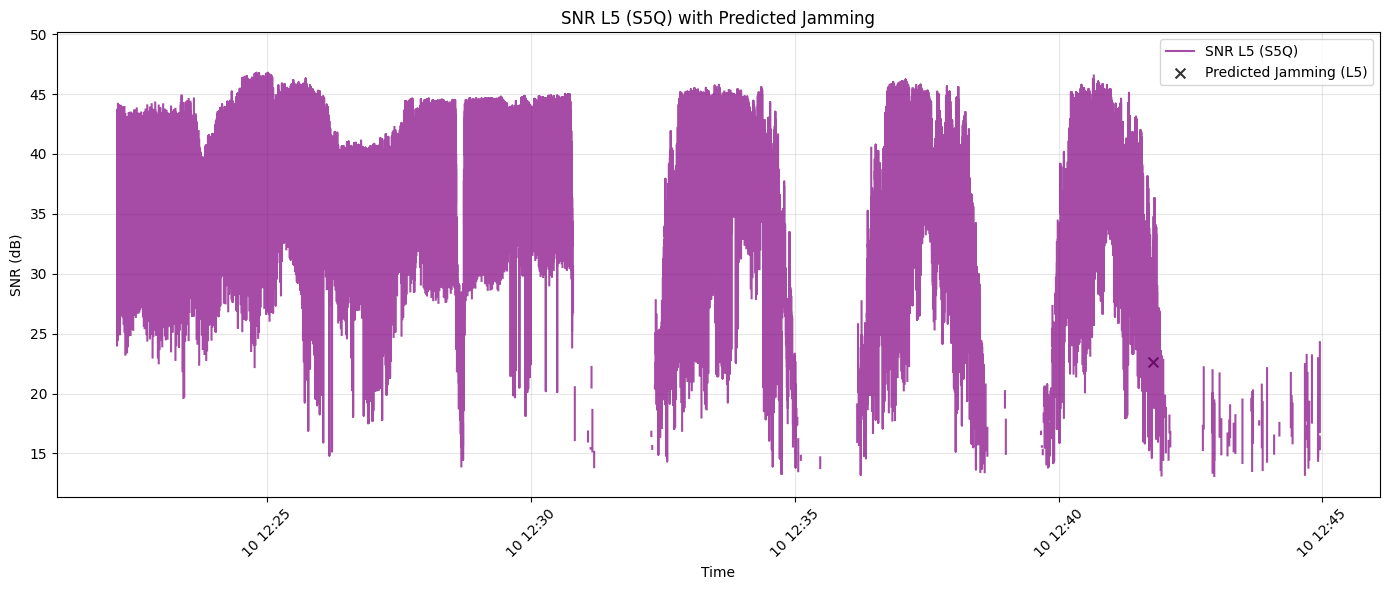

In [12]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt

#using haversine formula for geospatial distance calculation
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in km
    phi1, phi2 = np.radians(lat1), np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)
    a = np.sin(delta_phi / 2.0)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c

#calculating distance to jammer location
jammer_lat, jammer_lon = 69.21244, 15.85825
nmea_df['distance_to_jammer'] = haversine(
    nmea_df['latitude'], nmea_df['longitude'], jammer_lat, jammer_lon
)

#Converting SNR xarray data arrays to pandas dataframes
snr_dfL1 = snr_dataL1.to_dataframe().reset_index()
snr_dfL2 = snr_dataL2.to_dataframe().reset_index()
snr_dfL5 = snr_dataL5.to_dataframe().reset_index()

#Renaming columns for consistency reasons
for snr_df in [snr_dfL1, snr_dfL2, snr_dfL5]:
    snr_df.rename(columns={'time': 'timestamp'}, inplace=True)

#merging SNR data with location data based on timestamp
merged_data_L1 = pd.merge_asof(
    nmea_df.sort_values('timestamp'),
    snr_dfL1.sort_values('timestamp'),
    on='timestamp',
    direction='nearest'
)
merged_data_L2 = pd.merge_asof(
    nmea_df.sort_values('timestamp'),
    snr_dfL2.sort_values('timestamp'),
    on='timestamp',
    direction='nearest'
)
merged_data_L5 = pd.merge_asof(
    nmea_df.sort_values('timestamp'),
    snr_dfL5.sort_values('timestamp'),
    on='timestamp',
    direction='nearest'
)

#combining all SNR levels into a single dataframe
merged_data = merged_data_L1.merge(merged_data_L2, on='timestamp', suffixes=('_L1', '_L2'))
merged_data = merged_data.merge(merged_data_L5, on='timestamp')

#ensuring timestamp is in datetime format
merged_data['timestamp'] = pd.to_datetime(merged_data['timestamp'])

#filtering the data from the 6 channel jammer starting timestamp for analysis
start_timestamp = pd.to_datetime('2024-09-10 12:30:30')
merged_data = merged_data[merged_data['timestamp'] >= start_timestamp]

#creating features to detect significant SNR drops, we chose 5% quantile to reduce noise in data
merged_data['snr_drop_l1'] = merged_data['S1C'] < merged_data['S1C'].quantile(0.05)
merged_data['snr_drop_l2'] = merged_data['S2I'] < merged_data['S2I'].quantile(0.05)
merged_data['snr_drop_l5'] = merged_data['S5Q'] < merged_data['S5Q'].quantile(0.05)

#calculating rolling averages and sustained low readings, with a value of under 70% of mean
window_size = 50
mean_S1C, mean_S2I, mean_S5Q = merged_data['S1C'].mean(), merged_data['S2I'].mean(), merged_data['S5Q'].mean()
merged_data['rolling_S1C'] = merged_data['S1C'].rolling(window_size, min_periods=1).mean()
merged_data['rolling_S2I'] = merged_data['S2I'].rolling(window_size, min_periods=1).mean()
merged_data['rolling_S5Q'] = merged_data['S5Q'].rolling(window_size, min_periods=1).mean()

merged_data['sustained_low_l1'] = merged_data['rolling_S1C'] < (0.7 * mean_S1C)
merged_data['sustained_low_l2'] = merged_data['rolling_S2I'] < (0.7 * mean_S2I)
merged_data['sustained_low_l5'] = merged_data['rolling_S5Q'] < (0.7 * mean_S5Q)

#Defining labels for jamming based on signal drops
merged_data['jamming_label'] = (
    merged_data['snr_drop_l1'] | merged_data['sustained_low_l1'] |
    merged_data['snr_drop_l2'] | merged_data['sustained_low_l2'] |
    merged_data['snr_drop_l5'] | merged_data['sustained_low_l5']
)

#prepping features x and labels y for training
features = ['S1C', 'S2I', 'S5Q', 
            'rolling_S1C', 'rolling_S2I', 'rolling_S5Q',
            'sustained_low_l1', 'sustained_low_l2', 'sustained_low_l5',
            'snr_drop_l1', 'snr_drop_l2', 'snr_drop_l5']
X = merged_data[features]
y = merged_data['jamming_label']

#defining preprocessor for imputation and scaling
columns_to_impute = ['S1C', 'S2I', 'S5Q']
preprocessor = ColumnTransformer(
    transformers=[
        ('imputer', KNNImputer(n_neighbors=5, weights='uniform'), columns_to_impute),
        ('scaler', StandardScaler(), X.columns)
    ],
    remainder='passthrough'
)

#building pipeline with preprocessor and classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

#splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#Next we train the pipeline
pipeline.fit(X_train, y_train)

#wvaluating model and visualising it
y_pred = pipeline.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

#adding predicted jamming to dataset
merged_data['predicted_jamming'] = pipeline.predict(merged_data[features])

#plotting SNR levels with predicted jamming

#plotting SNR L1 with predicted jamming
plt.figure(figsize=(14, 6))
plt.plot(
    snr_dfL1['timestamp'], snr_dfL1['S1C'], 
    label='SNR L1 (S1C)', color='blue', alpha=0.7
)
#highlighting predicted jamming events
plt.scatter(
    merged_data.loc[merged_data['predicted_jamming'], 'timestamp'],  # Timestamps with predicted jamming
    merged_data.loc[merged_data['predicted_jamming'], 'S1C'],        # Corresponding S1C values
    color='black',
    label='Predicted Jamming (L1)',
    marker='x',
    s=50,
    alpha=0.8
)
plt.xlabel('Time')
plt.ylabel('SNR (dB)')
plt.title('SNR L1 (S1C) with Predicted Jamming')
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

#plotting SNR L2 with predicted jamming
plt.figure(figsize=(14, 6))
plt.plot(
    snr_dfL2['timestamp'], snr_dfL2['S2I'], 
    label='SNR L2 (S2I)', color='green', alpha=0.7
)
#highlighting predicted jamming events
plt.scatter(
    merged_data.loc[merged_data['predicted_jamming'], 'timestamp'],  #same as befopre
    merged_data.loc[merged_data['predicted_jamming'], 'S2I'],        
    color='black',
    label='Predicted Jamming (L2)',
    marker='x',
    s=50,
    alpha=0.8
)
plt.xlabel('Time')
plt.ylabel('SNR (dB)')
plt.title('SNR L2 (S2I) with Predicted Jamming')
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

#plotting SNR L5 with predicted jamming
plt.figure(figsize=(14, 6))
plt.plot(
    snr_dfL5['timestamp'], snr_dfL5['S5Q'], 
    label='SNR L5 (S5Q)', color='purple', alpha=0.7
)
#highlighting predicted jamming events
plt.scatter(
    merged_data.loc[merged_data['predicted_jamming'], 'timestamp'],  # same as before
    merged_data.loc[merged_data['predicted_jamming'], 'S5Q'],        
    color='black',
    label='Predicted Jamming (L5)',
    marker='x',
    s=50,
    alpha=0.8
)
plt.xlabel('Time')
plt.ylabel('SNR (dB)')
plt.title('SNR L5 (S5Q) with Predicted Jamming')
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [13]:
import ipyleaflet
import numpy as np
from geopy.distance import geodesic
#coordinates of the starting location (Stave) and jammer
stave = (69.21230, 15.85849)
jammer = (69.21244, 15.85825)

points_within_100m = 0
points_100m_to_200m = 0
#extract the points where jamming was detected
jamming_points = merged_data[merged_data['predicted_jamming']][['latitude', 'longitude', 'timestamp']]
jamming_points_D = merged_data[merged_data['jamming_label']][['latitude', 'longitude', 'timestamp']]

for idx, row in jamming_points.iterrows():
    point_location = (row['latitude'], row['longitude'])
    distance_to_jammer = geodesic(point_location, jammer).meters  # Calculate distance in meters

    if distance_to_jammer <= 100:
        points_within_100m += 1
    elif 100 < distance_to_jammer <= 200:
        points_100m_to_200m += 1

print(f"Number of points within 100m: {points_within_100m}")
print(f"Number of points between 100m and 200m: {points_100m_to_200m}")
#initializing the map centered on the starting location
map = ipyleaflet.Map(center=stave, zoom=18)

# adding a marker for the starting location (Stave)
#map.add(ipyleaflet.Marker(location=stave, title="Starting Location (Stave)"))

#Converting the route to a list of coordinates (path) using nmea_df
route_coords = nmea_df[['latitude', 'longitude']].values.tolist()

#adding the route as an AntPath (animated line)
map.add(ipyleaflet.AntPath(locations=route_coords, delay=1000, color="blue"))


# Add the anomaly (jamming) points to the map as markers
for idx, row in jamming_points.iterrows():
    anomaly_marker = ipyleaflet.Marker(
        location=(row['latitude'], row['longitude']),
        title=f"Timestamp: {row['timestamp']}",
        icon=ipyleaflet.Icon(
            icon_url="http://maps.google.com/mapfiles/ms/icons/yellow-dot.png",  
            icon_size=[15, 15]
        )
    )
    map.add(anomaly_marker)


#Adding the jammer location as a separate marker with a different color
jammer_marker = ipyleaflet.Marker(
    location=jammer,
    title="Jammer Location",
    icon=ipyleaflet.Icon(
        icon_url="http://maps.google.com/mapfiles/ms/icons/red-dot.png",  # Red for jammer
        icon_size=[35, 35]
    )
)
map.add(jammer_marker)

#displaying the map
map



Number of points within 100m: 63
Number of points between 100m and 200m: 21


Map(center=[69.2123, 15.85849], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'z…